In [1]:
import matplotlib.pyplot as plt
import os, sys

In [5]:
def define_color(cell):
    if cell == '#':
        return 'black'
    elif cell == ' ':   # Espacio vacío
        return 'white'
    elif cell == 'E':   # Entrada
        return 'green'
    elif cell == 'S':   # Salida
        return 'red'

In [6]:
project_path = os.getcwd()
sys.path.append(project_path)

In [ ]:
class MazeLoader:
    def __init__(self, filename):
        self.filename = filename
        self.maze = None

    def load_Maze(self):
        _maze = []
        file_path = os.path.join(project_path, self.filename)
        print("Loading Maze from", file_path)
        with open(file_path, 'r') as file:
            for line in file:
                _maze.append(list(line.strip()))
        self.maze = _maze
        return self

    def plot_maze(self):
        height = len(self.maze)
        width = len(self.maze[0])

        fig = plt.figure(figsize=(width/4, height/4))  # Ajusta el tamaño de la figura según el tamaño del Maze
        for y in range(height):
            for x in range(width):
                cell = self.maze[y][x]
                color = define_color(cell)
                plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')

        plt.xlim(0, width)
        plt.ylim(0, height)
        plt.gca().invert_yaxis()  # Invierte el eje y para que el origen esté en la esquina inferior izquierda
        plt.xticks([])
        plt.yticks([])
        fig.tight_layout()
        plt.show()
        return self
    def get_graph(self):
        # Convertir el laberinto en un grafo
        graph = {}
        height = len(self.maze)
        width = len(self.maze[0])
        for y in range(height):
            for x in range(width):
                cell = self.maze[y][x]
                if cell == '#':
                    continue
                neighbors = []
                if y > 0 and self.maze[y-1][x] != '#':
                    neighbors.append((x, y-1))
                if y < height - 1 and self.maze[y+1][x] != '#':
                    neighbors.append((x, y+1))
                if x > 0 and self.maze[y][x-1] != '#':
                    neighbors.append((x-1, y))
                if x < width - 1 and self.maze[y][x+1] != '#':
                    neighbors.append((x+1, y))
                graph[(x, y)] = neighbors
        return graph
    
    

Loading Maze from /Users/byronvinueza/Documents/MDS/MSDS_6003_IA/WS-USFQ/Taller2/P1/laberinto1.txt


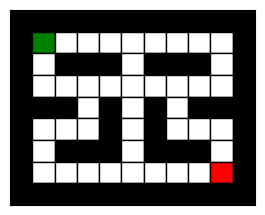

In [12]:
# leer el laberinto desde un archivo
maze_loader = MazeLoader('laberinto1.txt')
maze_loader.load_Maze()
maze_loader.plot_maze()
